In [2]:
import sys
!{sys.executable} -m pip install camb

In [3]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at C:\Users\lenovo\anaconda3\lib\site-packages\camb


In [5]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
#tau = np.random.uniform(0.6,1.0)
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [6]:
results = camb.get_results(pars)
print(results)

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2650
   max_l_tensor = 600
   max_eta_k = 6625.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.022
   omch2 = 0.122
   omk = 0.0
   omnuh2 = 0.0006451383989381787
   H0 = 67.5
   TCMB = 2.7255
   YHe = 0.24524332588411976
   num_nu_massless = 2.030666666666667
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0153333333333332]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   I

(0.5753058708128382, 0.10355505674631088)
H0
69.01797040535543
ns
0.8937019890821374
tau
0.9776732808110975
As
2.1429809393057916e-09
CosmoMC theta_MC parameter: 0.007488489104231316
Note: redshifts have been re-sorted (earliest first)
[0.06612255 0.06882464 0.07175609 0.07494718 0.07843369 0.08225824
 0.08647192 0.0911365  0.09632726 0.10213685 0.10868035 0.11610226
 0.1245859  0.13436647 0.14574896 0.15913243 0.17504201 0.19416723
 0.2173966  0.2458126 ]
(0.24114769817005025, 0.043406585670609045)
H0
54.82205271722337
ns
0.7311041601646621
tau
0.6293310804827108
As
2.192555740462021e-09
CosmoMC theta_MC parameter: 0.007276411905450324
Note: redshifts have been re-sorted (earliest first)
[0.04733232 0.04922473 0.05127133 0.05349101 0.05590568 0.05854084
 0.06142625 0.06459675 0.06809312 0.07196312 0.07626253 0.08105609
 0.08641801 0.0924315  0.09918638 0.10677301 0.11527014 0.12472349
 0.13511231 0.14630425]
(0.26415854494553326, 0.047548538090195984)
H0
84.78686967858533
ns
0.7001425

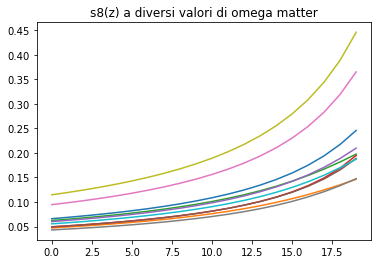

  (10, 20)
  [[1.         0.99999976 0.99999887 0.999997   0.99999363 0.99998797
  0.99997883 0.99996434 0.99994155 0.99990576 0.99984934 0.99975978
  0.99961616 0.99938309 0.99900011 0.99836319 0.997294   0.9954918
  0.99246836 0.98748314]
 [0.99999976 1.         0.99999967 0.99999846 0.99999586 0.99999113
  0.9999831  0.99996995 0.99994879 0.99991502 0.99986112 0.9997747
  0.99963507 0.99940713 0.99903074 0.9984024  0.99734438 0.9955567
  0.99255189 0.98759   ]
 [0.99999887 0.99999967 1.         0.99999955 0.99999786 0.99999421
  0.99998747 0.99997588 0.99995664 0.99992522 0.99987424 0.9997915
  0.99965654 0.99943456 0.99906588 0.99844755 0.99740257 0.99563184
  0.9926488  0.98771417]
 [0.999997   0.99999846 0.99999955 1.         0.99999937 0.99999698
  0.99999177 0.99998202 0.99996502 0.99993636 0.99988882 0.9998104
  0.99968091 0.99946594 0.99910631 0.99849974 0.9974701  0.99571929
  0.99276184 0.9878593 ]
 [0.99999363 0.99999586 0.99999786 0.99999937 1.         0.99999911
  0.9999

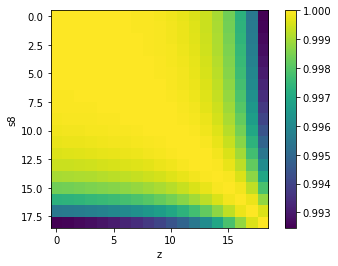

In [15]:
matrice_sigma8 = []

#chiama camb e calcola s8
pars0 = camb.CAMBparams()
def var_da_somma(somma):
    dm = somma/1.18
    bm=dm*0.18
    return dm,bm

for i in range(10):   
    somma = np.random.uniform(0.1,1.0)
    print(var_da_somma(somma))
    
    bm, dm =var_da_somma(somma)      
    h = np.random.uniform(0.4,1.0)  
    
    #H0=67.5
    H0 = h*100
    print('H0')
    print(H0)
    ns = np.random.uniform(0.6,1.0)
    print('ns')
    print(ns)
    tau = np.random.uniform(0.6,1.0)
    print('tau')
    print(tau)
    As = np.random.uniform(1e-9,3e-9)
    print('As')
    print(As)
    #cosmomc_theta = np.random.uniform(0.6,1.0)
    #z = np.linspace(0,4,100)
   
    pars0.set_cosmology(H0=H0, ombh2=bm*h**2, omch2=dm*h**2, tau=tau)
    pars0.InitPower.set_params( ns=ns)
    pars0.InitPower.set_params( As=As)
#Note non-linear corrections couples to smaller scales than you want
    redshifts= np.linspace(0,3,20)
    DA = results.angular_diameter_distance(redshifts)
    print('CosmoMC theta_MC parameter: %s'%results.cosmomc_theta())
    pars0.set_matter_power(redshifts, kmax=2.0)

#Linear spectra
    pars0.NonLinear = model.NonLinear_none
    results = camb.get_results(pars0)
#kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
    s80 = np.array(results.get_sigma8())
    print(results.get_sigma8())
    matrice_sigma8.append(s80)
matrice_sigma8=np.array(matrice_sigma8) 
plt.plot(matrice_sigma8.T)
plt.title('s8(z) a diversi valori di omega matter')
plt.show()
#differenze relative o rispetto a media
#al posto di H0 cambio densità materia tenendo cost rapporto con  CDM e considero H0 squared
plt.xlabel('z');
plt.ylabel('s8');
#plt.legend(['H0 standard','H0+10%', 'H0-10%'], loc='upper left');

#salvo i risultati
#risultati =[]
#risultati.append(results.get_sigma8())
#print(risultati)
sigma8_corr=np.corrcoef(matrice_sigma8.T)
print(" ", np.shape(matrice_sigma8))
print(" ", sigma8_corr)
#import append
#results.append(s80)
#results.append(s80)
#converto results in array
#arr=[results]
#x=np.arr=[risultati]


#cov e corr su tutto
from matplotlib.colors import LogNorm
dx, dy= 0.015, 0.05
y,x = np.mgrid[slice(0.2,1.0 + dy, dy),
               slice(0.2,1.0 + dx, dx)]
z = (sigma8_corr)
z=z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
#c = plt.imshow(z, cmap ='Greens', vmin=z_min, vmax=z_max,
 #               extent =[x.min(), x.max(), y.min(), y.max()], 
  #                 interpolation = 'nearest' , origin ='lower')

c=plt.imshow(z)
plt.colorbar(c)
plt.show()
#print(risultati)
